# Modelo ARIMA

Utilizando modelo ARIMA para modelar a série temporal

Utilizaremos uma série temporal da temperatura na cidade australiana de Melbourne

* Importando biblitecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Lendo arquivo CSV

In [2]:
dados = pd.read_csv('daily-min-temperatures.csv')

Exibindo cinco primeiras linhas

In [3]:
dados.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


* Definindo data como índice

In [4]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados = dados.set_index('Date')

* Graficando série temporal

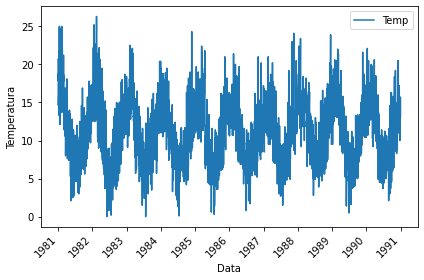

In [5]:
dados.plot()
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.tight_layout()

In [6]:
t_treino = dados[dados.index<'1990-01-01'].index.values
t_teste = dados[dados.index>='1990-01-01'].index.values
X_treino = dados[dados.index<'1990-01-01'].values
X_teste = dados[dados.index>='1990-01-01'].values

* Aplicando modelo autoregressivo

In [7]:
from statsmodels.tsa.api import ARIMA

In [8]:
modelo = ARIMA(X_treino, order=(2,0,2))
resultado = modelo.fit()

* Coeficientes

In [9]:
print('Coefficients: %s' % resultado.params)

Coefficients: [11.44864995  1.23902877 -0.24463756 -0.64947124 -0.22653356]


* Fazendo predições

In [10]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

* Calculando erros

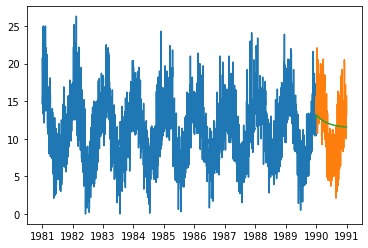

In [11]:
plt.plot(t_treino,X_treino)
plt.plot(t_teste,X_teste)
plt.plot(t_teste,X_pred)

* Calculando erros

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
MSE = mean_squared_error(X_teste,X_pred)

In [14]:
RMSE = np.sqrt(MSE)

In [15]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 3.70
